# Are drivers more likely to overachieve or underachieve and how can it we predict it?
## f1 dataset

### Enabling Performance Time analysis Pt. 1

In [13]:
import cProfile
pr = cProfile.Profile()
pr.enable()


Exception ignored When destroying _lsprof profiler:
Traceback (most recent call last):
  File "/var/folders/7l/syssfs_d76x6x7s56j0zj5zw0000gn/T/ipykernel_1276/1179731096.py", line 3, in <module>
RuntimeError: Cannot install a profile function while another profile function is being installed


### Importing the needed libraries to help with the analyis and data cleaning(pandas), visualising plots and charts(matplotlib), dealing numbers and creating queries(numpy)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Data Cleaning  
### reading the csv file and returning it as a dataframe 

In [ ]:
results=pd.read_csv('/Users/jana/Desktop/big data project/data/databasef1_csv/results.csv')
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25855,25861,1098,855,51,24,13,16,16,16,0.0,56,\N,\N,56,1,01:34.0,207.276,11
25856,25862,1098,846,1,4,11,17,17,17,0.0,55,\N,\N,51,3,01:35.8,203.327,12
25857,25863,1098,839,214,31,9,\N,R,18,0.0,41,\N,\N,34,13,01:36.8,201.278,26
25858,25864,1098,844,6,16,3,\N,R,19,0.0,39,\N,\N,37,16,01:37.2,200.506,5


###  creating a new table and selecting only the relevnt rows 

In [ ]:
relevant_columns = ['driverId', 'resultId', 'grid', 'laps', 'milliseconds', 'rank', 'positionOrder','position', 'points']
results_relevant = results.loc[:, relevant_columns]
results_relevant

,driverId,resultId,grid,laps,milliseconds,rank,positionOrder,position,points
0,1,1,1,58,5690616,2,1,1,10.0
1,2,2,5,58,5696094,3,2,2,8.0
2,3,3,7,58,5698779,5,3,3,6.0
3,4,4,11,58,5707797,7,4,4,5.0
4,5,5,3,58,5708630,1,5,5,4.0
...,...,...,...,...,...,...,...,...,...
25855,855,25861,13,56,\N,1,16,16,0.0
25856,846,25862,11,55,\N,3,17,17,0.0
25857,839,25863,9,41,\N,13,18,\N,0.0
25858,844,25864,3,39,\N,16,19,\N,0.0


### Converting milliseconds to a numeric data type to perform queries easier and "coerce" removes all values that cant be converted to numeric, while also describing all the attributes' type for better insight using the dtypes attribute.

In [ ]:
results_relevant['milliseconds'] = pd.to_numeric(results_relevant['milliseconds'], errors='coerce')
print(results.dtypes)

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object


### prints and selects all rows that contain non numeric rows or null variables

In [ ]:
non_numeric_rows = results[pd.to_numeric(results['milliseconds'], errors='coerce').isna()]

print(non_numeric_rows)

       resultId  raceId  driverId  constructorId number  grid position  \
5             6      18         6              3      8    13        6   
6             7      18         7              5     14    17        7   
7             8      18         8              6      1    15        8   
8             9      18         9              2      4     2       \N   
9            10      18        10              7     12    18       \N   
...         ...     ...       ...            ...    ...   ...      ...   
25855     25861    1098       855             51     24    13       16   
25856     25862    1098       846              1      4    11       17   
25857     25863    1098       839            214     31     9       \N   
25858     25864    1098       844              6     16     3       \N   
25859     25865    1098       857              1     81    18       \N   

      positionText  positionOrder  points  laps time milliseconds fastestLap  \
5                6             

### calculating the expected points for each driver based on their starting position(grid) and adding this information as a new column  

In [ ]:
expected_points = results_relevant.groupby('grid')['points'].transform('mean')
results_relevant['expected_points'] = expected_points


### calculating the difference between the points scored and the expected points, if positive then the driver overachieved 

In [ ]:
results_relevant['point_diff'] = results_relevant['points'] - results_relevant['expected_points']

## Data Analysis & Visualizations  


### scatter plot to show relationship between grid(starting position) and the the point difference, while demonstrating a line that points out the avg point difference for each starting position 

Text(0, 0.5, 'point difference')

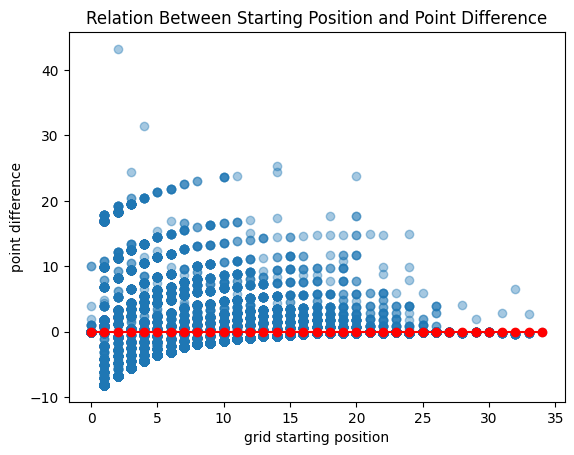

In [ ]:
plt.scatter(x=results_relevant['grid'], y=results_relevant['point_diff'], alpha=0.4)
mean_diff = results_relevant.groupby('grid')['point_diff'].mean()
plt.plot(mean_diff.index, mean_diff.values, color='red', marker='o', label='Mean')
plt.title("Relation Between Starting Position and Point Difference")
plt.xlabel("grid starting position")
plt.ylabel("point difference")

### scatter plot to show the points scored and grid position of drivers who overachieved 

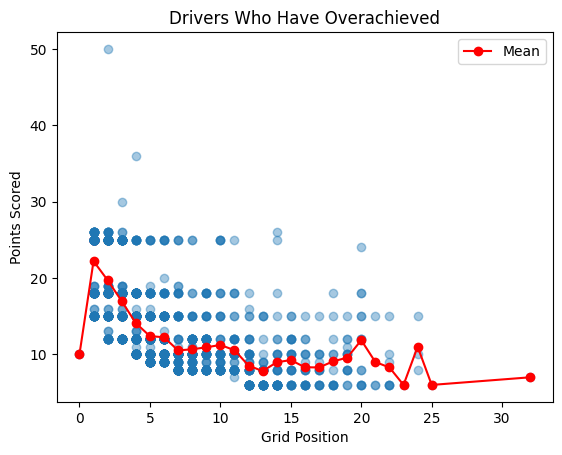

In [ ]:
overachievers = results_relevant[results_relevant['point_diff'] > overachieve_threshold]
plt.scatter(x=overachievers['grid'], y=overachievers['points'], alpha=0.4)

mean_points = overachievers.groupby('grid')['points'].mean()
plt.plot(mean_points.index, mean_points.values, color='red', marker='o', label='Mean')

plt.title('Drivers Who Have Overachieved')
plt.xlabel('Grid Position')
plt.ylabel('Points Scored')
plt.legend()
plt.show()

### scatter plot to show the points scored and grid position of drivers who underachieved 

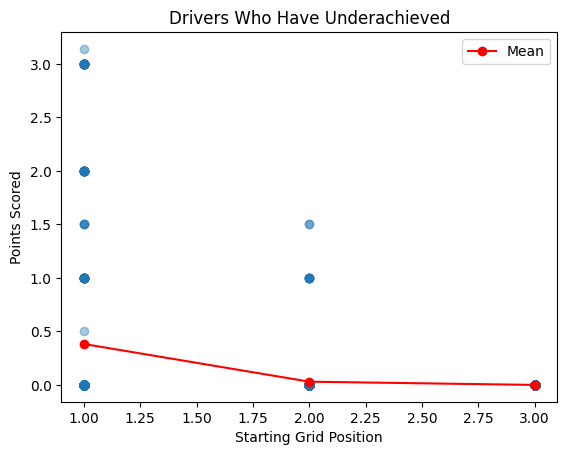

In [ ]:
underachievers = results_relevant[results_relevant['point_diff'] < underachieve_threshold]
plt.scatter(x=underachievers['grid'], y=underachievers['points'], alpha=0.4)
mean_points = underachievers.groupby('grid')['points'].mean()
plt.plot(mean_points.index, mean_points.values, color='red', marker='o', label='Mean')

plt.title('Drivers Who Have Underachieved')
plt.xlabel('Starting Grid Position')
plt.ylabel('Points Scored')
plt.legend()
plt.show()

### showing both the underachieved and overachieved thresholds to aid visualizing how drivers overachieved/underachieved from each starting position 

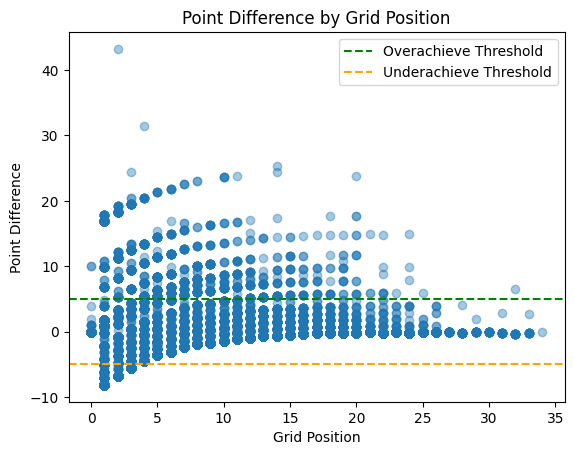

In [ ]:
overachieve_threshold = 5
underachieve_threshold = -5
plt.scatter(x=results_relevant['grid'],y=results_relevant['point_diff'],alpha=0.4)

plt.axhline(y=overachieve_threshold, color='green', linestyle='--', label='Overachieve Threshold')
plt.axhline(y=underachieve_threshold, color='orange', linestyle='--', label='Underachieve Threshold')
plt.title('Point Difference by Grid Position')
plt.xlabel('Grid Position')
plt.ylabel('Point Difference')
plt.legend()
plt.show()

### showing the relation between the starting position and the finishing position to show any patterns that can help teams when taking into consideration the position their driver is starting from

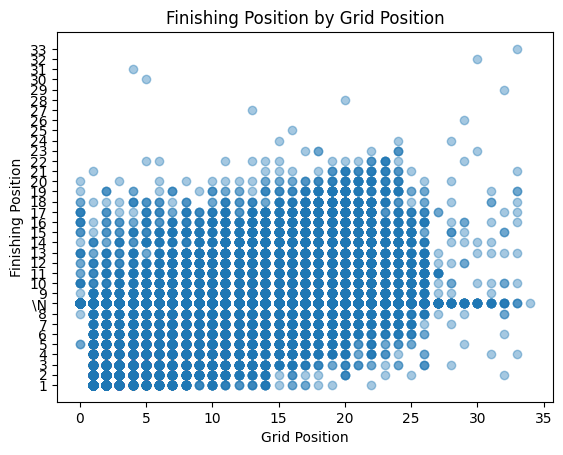

In [ ]:
plt.scatter(x=results_relevant['grid'], y=results_relevant['position'], alpha=0.4)
plt.title('Finishing Position by Grid Position')
plt.xlabel('Grid Position')
plt.ylabel('Finishing Position')
plt.show()



### visualizing the distriution of lap times for each grid position that can also used by teams to take into consideration when theyre caluclating their risks and different scenarios 

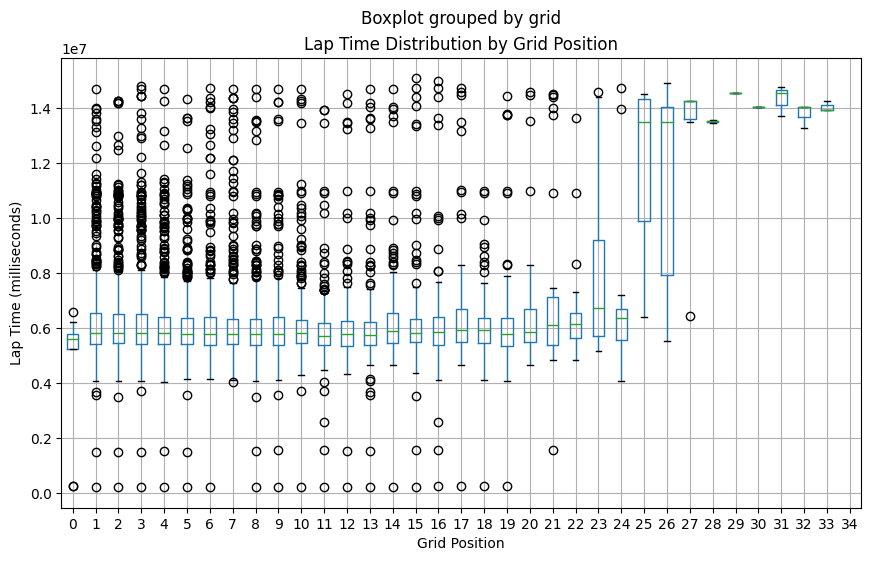

In [ ]:
results_relevant.boxplot(column='milliseconds', by='grid', figsize=(10,6))
plt.title('Lap Time Distribution by Grid Position')
plt.xlabel('Grid Position')
plt.ylabel('Lap Time (milliseconds)')
plt.show()

### bar plot to see the number of races each driver has won

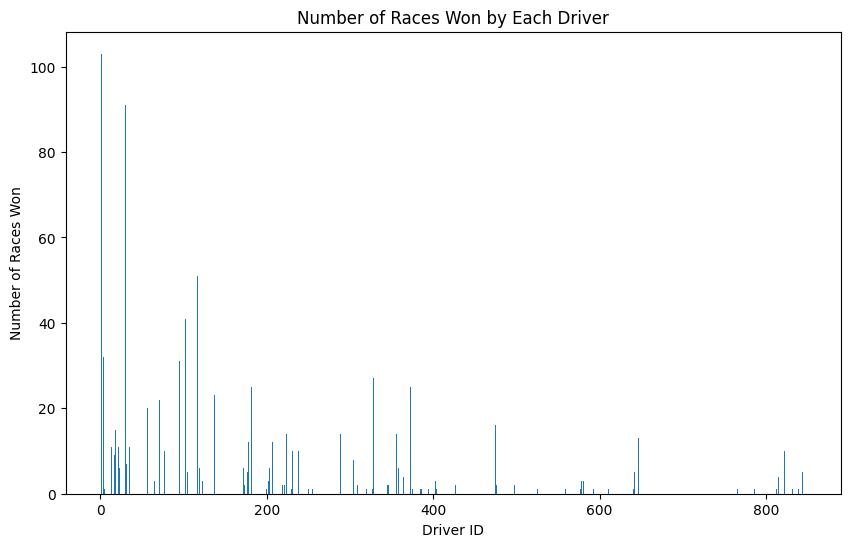

In [ ]:
driver_wins = results_relevant[results_relevant['positionOrder'] == 1].groupby('driverId').size()

plt.figure(figsize=(10, 6))
plt.bar(driver_wins.index, driver_wins.values)
plt.title('Number of Races Won by Each Driver')
plt.xlabel('Driver ID')
plt.ylabel('Number of Races Won')
plt.show()

### identifying if there is any relationship between the fastest lap speed and the mean positionof drivers to help in the process of preparation of teams for different positions

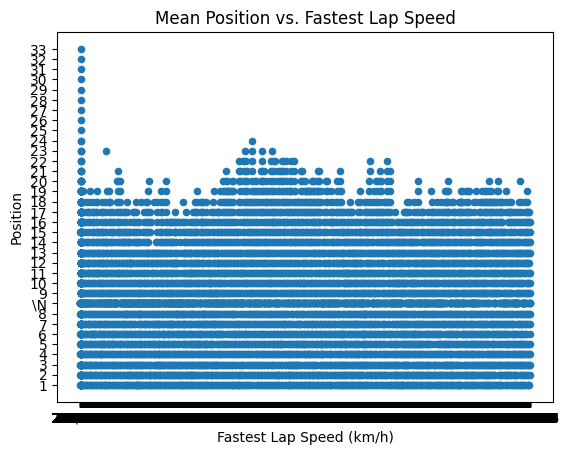

In [ ]:
df = pd.DataFrame(results_relevant2)
df = df.dropna(subset=["position"], how="any")
results_relevant2.plot.scatter(x="fastestLapSpeed",y="position")
plt.xlabel("Fastest Lap Speed (km/h)")
plt.ylabel("Position")
plt.title("Mean Position vs. Fastest Lap Speed")

plt.show()
#min max , x limit, pearson correlatoin , pivot table average *plot al pivot table  and calc correlatio for pivot table

### scatter plot to show the relation between the point differance and the grid(starting position)

/var/folders/7l/syssfs_d76x6x7s56j0zj5zw0000gn/T/ipykernel_2533/2676523546.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  points_avg = results.groupby('point_diff').mean()


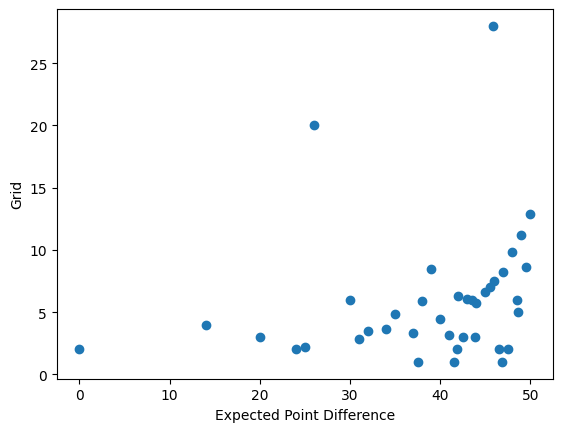

In [ ]:
results = pd.DataFrame(results_relevant)
results["grid"] = pd.to_numeric(results["grid"])
results["points"] = pd.to_numeric(results["points"])
results["point_diff"] = results["points"].max() - results["points"]

points_avg = results.groupby('point_diff').mean()

plt.scatter(points_avg.index, points_avg["grid"])
plt.xlabel("Expected Point Difference")
plt.ylabel("Grid")
plt.show()

###  creating a Pivot Table removing missing values, converting to numeric data type,in order to analyze the average fastestlapspeed for each driver in each position which can help teams

In [ ]:
results = results.replace(to_replace=r'^\\N$', value=pd.NA, regex=True)
results["fastestLapSpeed"] = pd.to_numeric(results["fastestLapSpeed"])
results["position"] = pd.to_numeric(results["position"])
pivot_table = results.pivot_table(values=["fastestLapSpeed"], index=["position"], columns=["driverId"], aggfunc="mean")
results = results.dropna(axis=1)
print(pivot_table)

         fastestLapSpeed                                                  \
driverId             1           2           3           4           5     
position                                                                   
1.0           207.464029         NaN  199.398087  204.968290  192.917000   
2.0           208.089226  202.055000  198.275120  207.093944  207.086000   
3.0           206.196353  196.133000  206.034444  207.851393  208.031000   
4.0           208.953440  217.578125  197.206909  200.689583  199.852500   
5.0           201.202750  218.278571  204.835125  203.970320  200.978857   
6.0           192.318571  199.535889  210.026563  202.339800  231.546000   
7.0           203.361500  198.662444  193.884267  194.922435  209.981200   
8.0           192.102200  208.687667  208.039400  209.975562  195.739500   
9.0           201.572857  196.072250  200.648500  197.604250  202.621250   
10.0          213.602667  201.956000  205.070111  206.729833  206.959667   
11.0        

### visualizing differnt queries and a quick numerical look for each attribute

In [ ]:
results_relevant.describe()

,driverId,resultId,grid,laps,milliseconds,positionOrder,points,expected_points,point_diff
count,25860.000000,25860.000000,25860.000000,25860.000000,7.098000e+03,25860.000000,25860.000000,25860.000000,2.586000e+04
mean,262.114346,12931.337548,11.178538,45.982753,6.231031e+06,12.874169,1.879468,1.879468,7.033988e-17
std,268.961443,7466.459297,7.242723,29.799420,1.677767e+06,7.711358,4.173914,2.251567,3.514542e+00
min,1.000000,1.000000,0.000000,0.000000,2.070710e+05,1.000000,0.000000,0.000000,-8.151824e+00
25%,56.000000,6465.750000,5.000000,22.000000,5.415016e+06,6.000000,0.000000,0.251241,-1.191352e+00
50%,163.000000,12930.500000,11.000000,52.000000,5.812746e+06,12.000000,0.000000,0.915896,-2.726316e-01
75%,360.000000,19395.250000,17.000000,66.000000,6.424544e+06,18.000000,2.000000,3.130556,-1.988813e-02
max,858.000000,25865.000000,34.000000,200.000000,1.509054e+07,39.000000,50.000000,8.151824,4.323114e+01


### Pre-processing the dataframe and replacing missing values in the milliseconds column and replacing it with 0 to have a supported datatype when creating visuals or analyzing 

In [ ]:

results_relevant['milliseconds'] = results_relevant['milliseconds'].replace([np.inf, -np.inf, np.nan], 0)

results_relevant['milliseconds'] = results_relevant['milliseconds'].round().astype(int)
# replacing al null values with 0 w making al milliseconds column yeb2a interger type badal float

### calculating queries such as the mean,median and standard deviation of the rank difference, if the mean rank differnece is positive then the driver has overall overachieved throughout the season

In [ ]:
results_relevant = results_relevant.replace('\\N', np.nan)

results_relevant['rank'] = results_relevant['rank'].astype('Int64')
results_relevant['rank_diff'] = results_relevant['grid'] - results_relevant['rank']

mean_diff = results_relevant['rank_diff'].mean()
median_diff = results_relevant['rank_diff'].median()
std_diff = results_relevant['rank_diff'].std()

print(f"Mean rank difference: {mean_diff:.2f}")
print(f"Median rank difference: {median_diff:.2f}")
print(f"Standard deviation of rank difference: {std_diff:.2f}")


Mean rank difference: 0.53
Median rank difference: 0.00
Standard deviation of rank difference: 5.65


### creating a dataframe to have relevant columns only and remove all unrelated attributes 

In [ ]:
relevant_columns2 = ['fastestLapSpeed', 'position']
results_relevant2 = results.loc[:, relevant_columns2]
results_relevant2


,fastestLapSpeed,position
0,218.3,1
1,217.586,2
2,216.719,3
3,215.464,4
4,218.385,5
...,...,...
25855,207.276,16
25856,203.327,17
25857,201.278,\N
25858,200.506,\N


### removing null values, finsing maximum and minimum values for the fastestlapspeed attribute

In [ ]:
df = pd.DataFrame(results_relevant2)
df = df.dropna(subset=["fastestLapSpeed"], how="any")

max_value = df["fastestLapSpeed"].max()
min_value = df["fastestLapSpeed"].min()

print("Original dataset:")
print(pd.DataFrame(results_relevant2))
print("\nDataset after dropping rows with null values in the 'fastestLapSpeed' column:")
print(df)
print("\nMaximum value in the 'fastestLapSpeed' column:", max_value)
print("Minimum value in the 'fastestLapSpeed' column:", min_value)

Original dataset:
      fastestLapSpeed position
0               218.3        1
1             217.586        2
2             216.719        3
3             215.464        4
4             218.385        5
...               ...      ...
25855         207.276       16
25856         203.327       17
25857         201.278       \N
25858         200.506       \N
25859         193.494       \N

[25860 rows x 2 columns]

Dataset after dropping rows with null values in the 'fastestLapSpeed' column:
      fastestLapSpeed position
0               218.3        1
1             217.586        2
2             216.719        3
3             215.464        4
4             218.385        5
...               ...      ...
25855         207.276       16
25856         203.327       17
25857         201.278       \N
25858         200.506       \N
25859         193.494       \N

[25860 rows x 2 columns]

Maximum value in the 'fastestLapSpeed' column: \N
Minimum value in the 'fastestLapSpeed' column: 100.615


### removing null values, finsing maximum and minimum values for the position attribute

In [ ]:
df = pd.DataFrame(results_relevant2)
df = df.dropna(subset=["position"], how="any")

max_value = df["position"].max()
min_value = df["position"].min()

print("Original dataset:")
print(pd.DataFrame(results_relevant2))
print("\nDataset after dropping rows with null values in the 'position' column:")
print(df)
print("\nMaximum value in the 'position' column:", max_value)
print("Minimum value in the 'position' column:", min_value)

Original dataset:
      fastestLapSpeed position
0               218.3        1
1             217.586        2
2             216.719        3
3             215.464        4
4             218.385        5
...               ...      ...
25855         207.276       16
25856         203.327       17
25857         201.278       \N
25858         200.506       \N
25859         193.494       \N

[25860 rows x 2 columns]

Dataset after dropping rows with null values in the 'position' column:
      fastestLapSpeed position
0               218.3        1
1             217.586        2
2             216.719        3
3             215.464        4
4             218.385        5
...               ...      ...
25855         207.276       16
25856         203.327       17
25857         201.278       \N
25858         200.506       \N
25859         193.494       \N

[25860 rows x 2 columns]

Maximum value in the 'position' column: \N
Minimum value in the 'position' column: 1


### replacing null values, converting the values to numeric data types, then created a pivot table to the average fastest lap speed and position within specified limits

In [ ]:
df = pd.DataFrame(results_relevant2)
df = df.replace(to_replace=r'^\\N$', value=np.nan, regex=True)
df["fastestLapSpeed"] = pd.to_numeric(df["fastestLapSpeed"])
df["position"] = pd.to_numeric(df["position"])

fastest_lap_speed_lower_limit = 265
fastest_lap_speed_upper_limit = 95
position_lower_limit = -5
position_upper_limit = 38

pivot_table = df.query(f"{fastest_lap_speed_lower_limit} <= fastestLapSpeed <= {fastest_lap_speed_upper_limit} and {position_lower_limit} <= position <= {position_upper_limit}") \
    .pivot_table(values=["fastestLapSpeed", "position"], aggfunc="mean")

print("Dataset:")
print(df)
print(f"\nAverage fastest lap speed and position between {fastest_lap_speed_lower_limit} and {fastest_lap_speed_upper_limit} km/h and between positions {position_lower_limit} and {position_upper_limit}:")
print(pivot_table)

Dataset:
       fastestLapSpeed  position
0              218.300       1.0
1              217.586       2.0
2              216.719       3.0
3              215.464       4.0
4              218.385       5.0
...                ...       ...
25855          207.276      16.0
25856          203.327      17.0
25857          201.278       NaN
25858          200.506       NaN
25859          193.494       NaN

[25860 rows x 2 columns]

Average fastest lap speed and position between 265 and 95 km/h and between positions -5 and 38:
Empty DataFrame
Columns: []
Index: []


### calculating the mean of values and then grouping it by the point_diff column 

In [ ]:
results = pd.DataFrame(results_relevant)
points_avg=results_relevant.groupby('point_diff').mean()
print(points_avg)

              driverId      resultId  grid       laps  milliseconds      rank  \
point_diff                                                                      
-8.151824   224.439344  12344.127869   1.0  35.478689  1.263705e+05  7.302326   
-7.651824   182.000000  14448.000000   1.0  29.000000  3.566970e+06      <NA>   
-7.151824   288.590909  13725.818182   1.0  57.681818  1.491530e+06       4.5   
-6.768862   215.767705  12362.203966   2.0  34.776204  4.065589e+05  9.673077   
-6.651824   615.750000  19744.000000   1.0  81.500000  0.000000e+00      <NA>   
...                ...           ...   ...        ...           ...       ...   
 24.395349    1.000000  23983.000000  14.0  67.000000  5.549845e+06       1.0   
 24.450101  822.000000  22520.000000   3.0  55.000000  5.971499e+06       6.0   
 25.395349  830.000000  25666.000000  14.0  44.000000  5.152894e+06       1.0   
 31.454462   13.000000  22519.000000   4.0  55.000000  5.945195e+06       2.0   
 43.231138    1.000000  2251

/var/folders/7l/syssfs_d76x6x7s56j0zj5zw0000gn/T/ipykernel_2533/3261123742.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  points_avg=results_relevant.groupby('point_diff').mean()


### Pearson correlation coefficient of the avergae points which is used for determinng the direction of the correlation 

In [ ]:
corr_coef = points_avg.corr().iloc[0,1]
print("Correlation coefficient: ", corr_coef)

Correlation coefficient:  0.6087872215258276


### Performance Time analysis Pt. 2

In [15]:

pr.disable()
pr.print_stats()


         30059 function calls (28319 primitive calls) in 13.042 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 2313326033.py:1(<module>)
        1    0.000    0.000    0.000    0.000 2461326651.py:1(<module>)
        2    0.000    0.000    0.000    0.000 <frozen _collections_abc>:771(get)
        8    0.000    0.000    0.000    0.000 <frozen abc>:117(__instancecheck__)
        6    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
        9    0.000    0.000    0.000    0.000 <frozen genericpath>:121(_splitext)
        4    0.000    0.000    0.000    0.000 <frozen genericpath>:16(exists)
      662    0.001    0.000    0.002    0.000 <frozen genericpath>:69(commonprefix)
       18    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1209(_handle_fromlist)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:405(parent)
     